In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('/content/winequality-red.csv')

# Exploratory Data Analysis

In [60]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [62]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [63]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [64]:
df.shape

(1599, 12)

<Axes: xlabel='quality', ylabel='count'>

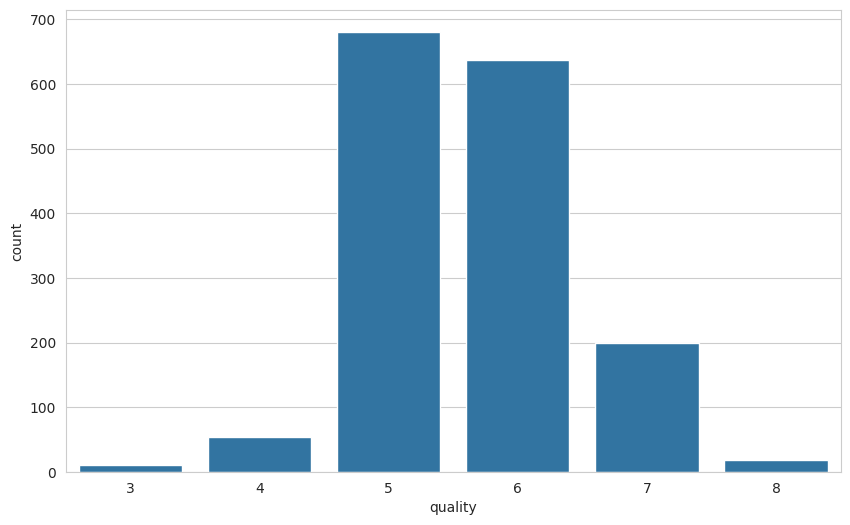

In [65]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'quality', data = df)

*Lets compare each and every feature with quality feature to get more insights*

<Axes: xlabel='quality', ylabel='fixed acidity'>

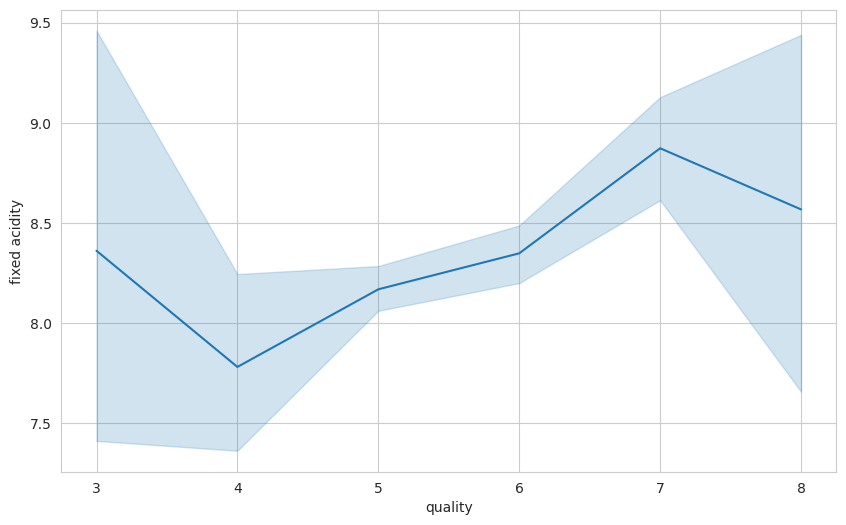

In [66]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.lineplot(data = df, x = 'quality',y = 'fixed acidity')

we can see that fixed acidity does not provide much inforamation to classify quality.

<Axes: xlabel='quality', ylabel='volatile acidity'>

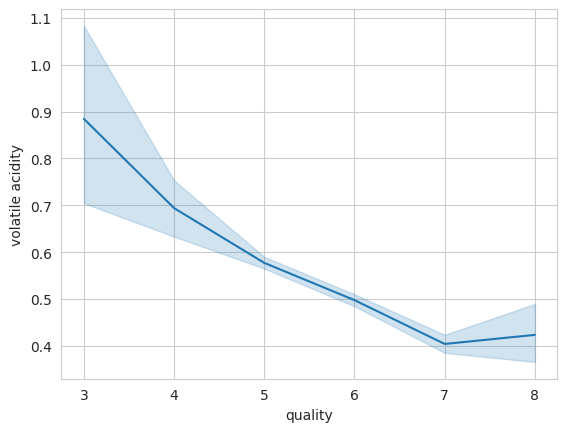

In [67]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality',y = 'volatile acidity',data = df)

As the quality score increases volatile acidity composition decreases.

<Axes: xlabel='quality', ylabel='citric acid'>

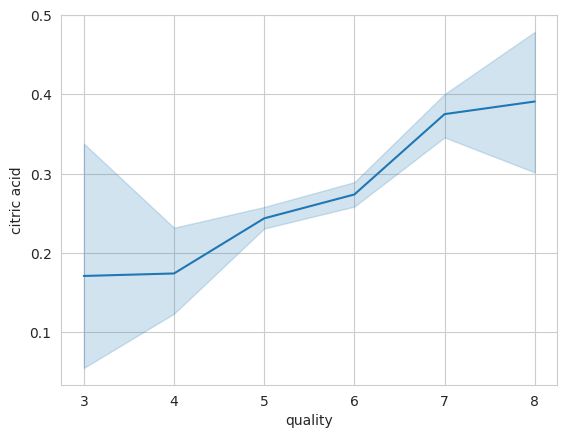

In [68]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality',y = 'citric acid',data = df)

Composition of citric acid go higher as we go higher in the quality of the wine.

<Axes: xlabel='quality', ylabel='residual sugar'>

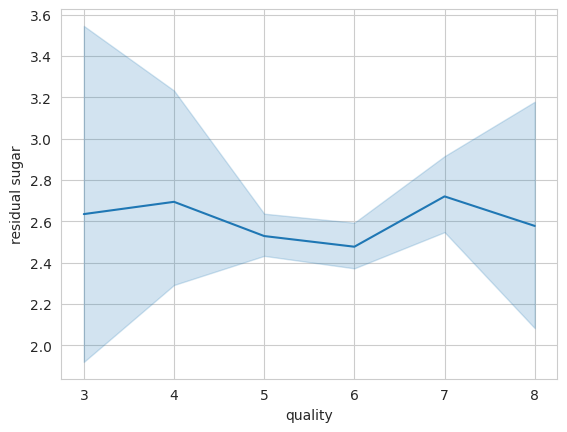

In [69]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality',y = 'residual sugar',data = df)

There is no specific relation between quality and residual sugar.


<Axes: xlabel='quality', ylabel='chlorides'>

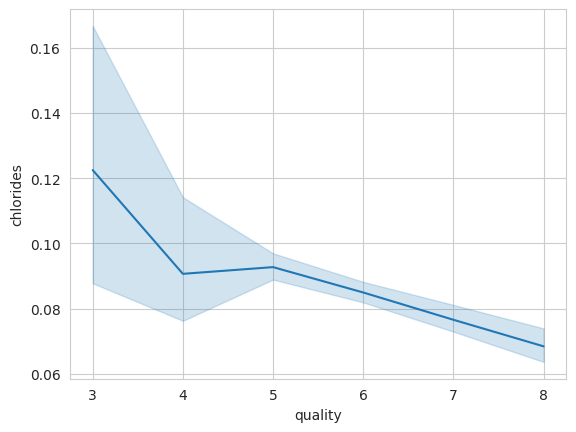

In [70]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality',y = 'chlorides',data = df)

Quality increses as composition of chlorides decreses.

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

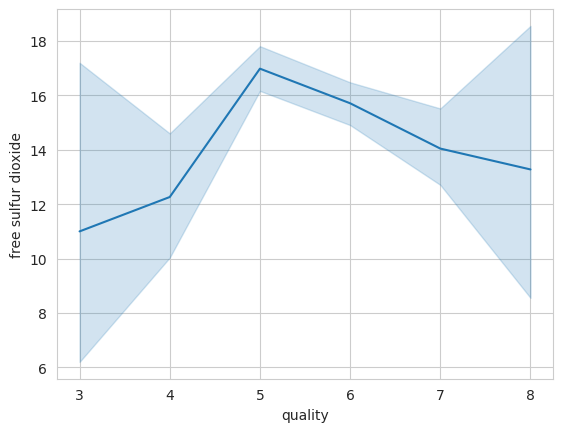

In [71]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality',y = 'free sulfur dioxide',data = df)

No specific relationship

<Axes: xlabel='quality', ylabel='sulphates'>

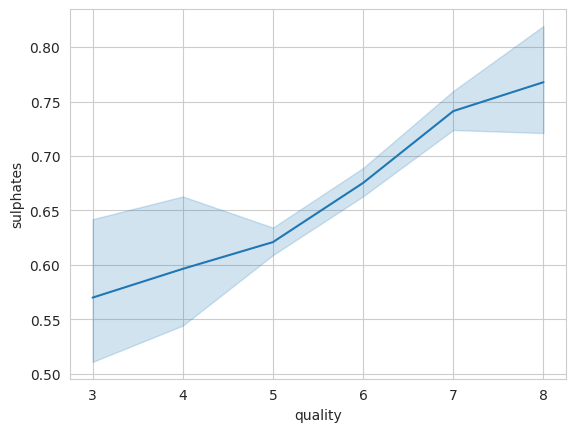

In [72]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality',y = 'sulphates',data = df)

Sulphates level goes higher with the quality of wine.

<Axes: xlabel='quality', ylabel='alcohol'>

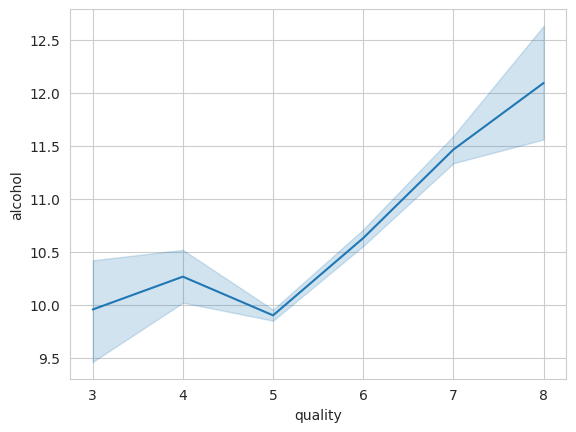

In [73]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality',y = 'alcohol',data = df)

alcohol level goes higher with the quality of wine.

<Axes: >

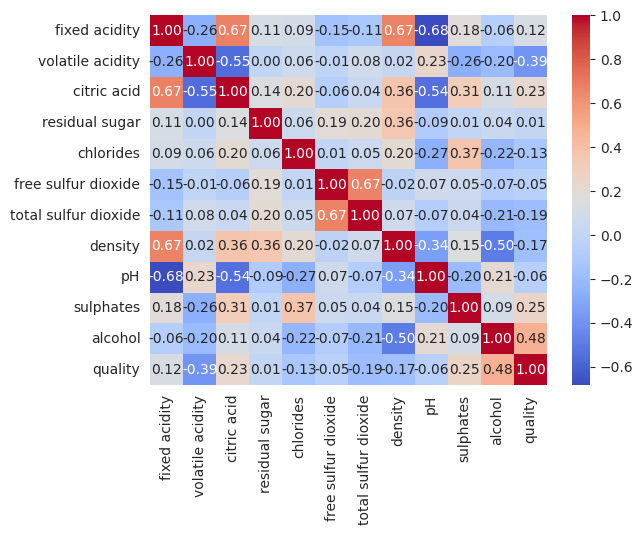

In [74]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = '.2f')

In [75]:
bins = (2,6.5,8)
group_names = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins = bins, labels = group_names)

In [76]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [77]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [78]:
encoder = LabelEncoder()

In [79]:
df['quality'] = encoder.fit_transform(df['quality'])

In [80]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [81]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

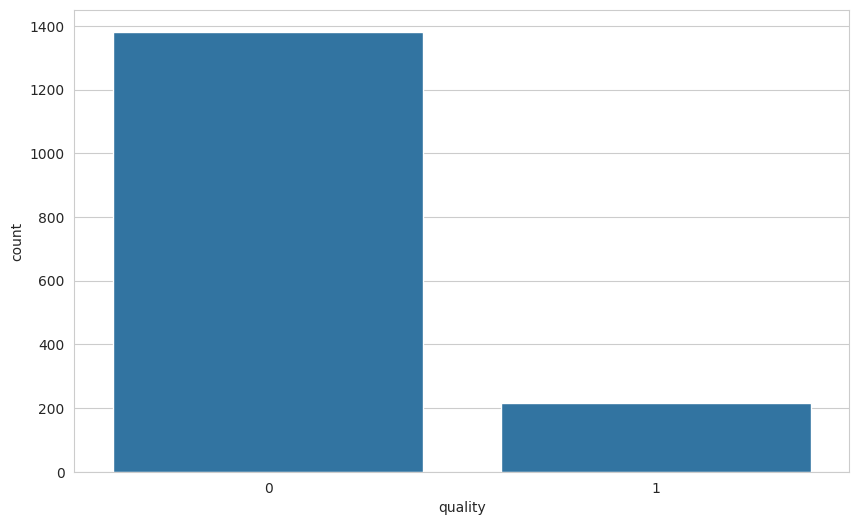

In [82]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'quality', data = df)

And we can clearly see that there is data imbalance.

# Handeling imbalance dataset

In [83]:
x = df.drop('quality',axis = 1)
y = df.quality

In [84]:
from imblearn.over_sampling import RandomOverSampler

In [85]:
os =  RandomOverSampler(random_state = 0)
X_train_res, y_train_res = os.fit_resample(x, y)

In [86]:
X_train_res.shape, y_train_res.shape

((2764, 11), (2764,))

Now we have same number for good and bad quality of wine.

# Importing Torch

In [87]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from collections import OrderedDict

In [88]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [89]:
device

device(type='cpu')

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_train_res,y_train_res,test_size=0.2,random_state = 9)

In [91]:
X_train.shape

(2211, 11)

In [92]:
X_test = X_train[1711:]
X_train = X_train[0:1711]
y_test = y_train[1711:]
y_train = y_train[0:1711]

In [93]:
print("train_size:  ")
X_train.shape,y_train.shape

train_size:  


((1711, 11), (1711,))

In [94]:
print("validation_size: ")
X_valid.shape,y_valid.shape

validation_size: 


((553, 11), (553,))

In [95]:
print("validation_size: ")
X_test.shape,y_test.shape

validation_size: 


((500, 11), (500,))

In [96]:
X_train_numpy = X_train.values
y_train_numpy = y_train.values
X_valid_numpy = X_valid.values
y_valid_numpy = y_valid.values
X_test_numpy = X_test.values
y_test_numpy = y_test.values

In [97]:
X_train_tensor = torch.tensor(X_train_numpy, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_numpy, dtype=torch.long)
X_val_tensor = torch.tensor(X_valid_numpy, dtype=torch.float32)
y_val_tensor = torch.tensor(y_valid_numpy, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_numpy, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_numpy, dtype=torch.float32)

In [105]:
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
valid_dataset = TensorDataset(X_val_tensor,y_val_tensor)
test_dataset = TensorDataset(X_test_tensor,y_test_tensor)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
valid_loader = DataLoader(valid_dataset,batch_size=64)
test_loader = DataLoader(test_dataset,batch_size=64)

# Model creation

In [99]:
class DiabetesNet(nn.Module):
  def __init__(self,input_size,num_classes):
    super(DiabetesNet,self).__init__()
    self.dropout = nn.Dropout(p = 0.05)
    self.input_layer = nn.Sequential(nn.Linear(input_size,50),nn.ReLU()) # there are 50 neurons in first hidden layer that taken inputs from input layer.
    self.h1 = nn.Sequential(nn.Linear(50,100),nn.ReLU())
    self.h2 = nn.Sequential(nn.Linear(100,500),nn.ReLU())
    self.h3 = nn.Sequential(nn.Linear(500, 750), nn.ReLU())
    self.h4 = nn.Sequential(nn.Linear(750, 1000), nn.ReLU())
    self.h5 = nn.Sequential(nn.Linear(1000, 750), nn.ReLU())
    self.h6 = nn.Sequential(nn.Linear(750, 500), nn.ReLU())
    self.h7 = nn.Sequential(nn.Linear(500, 100), nn.ReLU())
    self.h8 = nn.Sequential(nn.Linear(100, 50), nn.ReLU())
    self.h9 = nn.Sequential(nn.Linear(50, num_classes), nn.Softmax(dim = 1))


  def forward(self, x):
    x = self.input_layer(x)
    x = self.h1(x)
    x = self.h2(x)
    x = self.h3(x)
    x = self.h4(x)
    x = self.h5(x)
    x = self.h6(x)
    x = self.h7(x)
    x = self.h8(x)
    x = self.h9(x)
    return x


In [100]:
model = DiabetesNet(11,2) #input_size = 11,num_class = 2 #and our nural network model is ready
learning_rate = 0.0001
epochs = 100
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate,weight_decay = 0.000001)
min_loss = np.inf
training_losses,valid_losses,accs = [],[],[]
model.to(device)

DiabetesNet(
  (dropout): Dropout(p=0.05, inplace=False)
  (input_layer): Sequential(
    (0): Linear(in_features=11, out_features=50, bias=True)
    (1): ReLU()
  )
  (h1): Sequential(
    (0): Linear(in_features=50, out_features=100, bias=True)
    (1): ReLU()
  )
  (h2): Sequential(
    (0): Linear(in_features=100, out_features=500, bias=True)
    (1): ReLU()
  )
  (h3): Sequential(
    (0): Linear(in_features=500, out_features=750, bias=True)
    (1): ReLU()
  )
  (h4): Sequential(
    (0): Linear(in_features=750, out_features=1000, bias=True)
    (1): ReLU()
  )
  (h5): Sequential(
    (0): Linear(in_features=1000, out_features=750, bias=True)
    (1): ReLU()
  )
  (h6): Sequential(
    (0): Linear(in_features=750, out_features=500, bias=True)
    (1): ReLU()
  )
  (h7): Sequential(
    (0): Linear(in_features=500, out_features=100, bias=True)
    (1): ReLU()
  )
  (h8): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
  )
  (h9): Sequential

# Train & Validation

In [101]:
def train(min_loss):
    for epoch in range(epochs):
        training_loss = 0
        model.train()
        for x, y in train_loader:
            optimizer.zero_grad()
            x, y = x.to(device), y.to(device)
            yhat = model(x) #This is the forward pass of the neural network.
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()

            training_loss += loss.item()

        training_losses.append(training_loss)

        valid_loss = 0
        acc = 0
        model.eval()
        with torch.no_grad():
            for x, y in valid_loader:
                x, y = x.to(device), y.to(device)
                yhat = model(x)
                loss = criterion(yhat, y)
                valid_loss += loss.item()

                _, top_class = yhat.topk(1, dim = 1)
                eq = top_class == y.view(-1, 1)
                acc += eq.sum().item()

            valid_losses.append(valid_loss)
            accs.append((acc/len(X_valid)) * 100)

        print("Epoch: {}.. \tTraining Loss: {:.5f}.. \tValid Loss: {:.5f}.. \tAccuracy: {:.2f}%..".format(epoch + 1, training_loss, valid_loss, (acc/len(X_valid)) * 100))

        if valid_loss <= min_loss:
            print("Saving Model {:.4f} ---> {:.4f}".format(min_loss, valid_loss))
            save_obj = OrderedDict([
                ("model", model.state_dict()),
                ("min_loss", min_loss),
                ("learning_rate", learning_rate)
            ])
            torch.save(save_obj,  "diabetes2.pt")
            min_loss = valid_loss

In [102]:
train(min_loss)

Epoch: 1.. 	Training Loss: 18.65854.. 	Valid Loss: 6.17474.. 	Accuracy: 51.54%..
Saving Model inf ---> 6.1747
Epoch: 2.. 	Training Loss: 18.22481.. 	Valid Loss: 5.97583.. 	Accuracy: 62.75%..
Saving Model 6.1747 ---> 5.9758
Epoch: 3.. 	Training Loss: 17.43525.. 	Valid Loss: 5.85931.. 	Accuracy: 62.57%..
Saving Model 5.9758 ---> 5.8593
Epoch: 4.. 	Training Loss: 17.14917.. 	Valid Loss: 5.92588.. 	Accuracy: 62.39%..
Epoch: 5.. 	Training Loss: 17.19280.. 	Valid Loss: 5.86435.. 	Accuracy: 62.21%..
Epoch: 6.. 	Training Loss: 17.29230.. 	Valid Loss: 5.85606.. 	Accuracy: 62.39%..
Saving Model 5.8593 ---> 5.8561
Epoch: 7.. 	Training Loss: 16.95837.. 	Valid Loss: 5.85897.. 	Accuracy: 63.11%..
Epoch: 8.. 	Training Loss: 16.87417.. 	Valid Loss: 5.87362.. 	Accuracy: 63.11%..
Epoch: 9.. 	Training Loss: 16.81690.. 	Valid Loss: 5.87598.. 	Accuracy: 61.48%..
Epoch: 10.. 	Training Loss: 16.82949.. 	Valid Loss: 5.84738.. 	Accuracy: 62.75%..
Saving Model 5.8561 ---> 5.8474
Epoch: 11.. 	Training Loss: 16.7

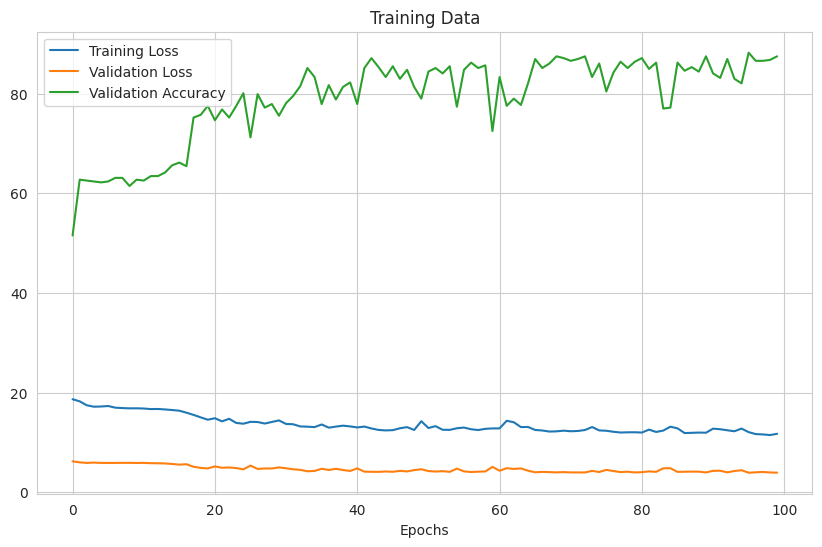

In [103]:
ephs = np.array([i for i in range(epochs)])
plt.figure(figsize = (10,6))
plt.plot(ephs,np.array(training_losses),label = 'Training Loss')
plt.plot(ephs,np.array(valid_losses),label = 'Validation Loss')
plt.plot(ephs,np.array(accs),label = 'Validation Accuracy')
plt.title('Training Data')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [108]:
total_correct = 0
with torch.no_grad():
  model.eval()
  for batch in test_loader:
    x,y = batch
    x,y = x.to(device),y.to(device)
    yhat = model(x)
    # Find the top predicted class indices
    top_p,top_class = yhat.topk(1,dim = 1)
    # Check if the predicted classes match the true classes
    # The view(-1, 1) is used to reshape y to have a single column
    eq = top_class == y.view(-1,1)

    #This line sums up the correct predictions across all examples in the batch.
    total_correct += eq.sum().item()

    #The topk(1) operation retrieves only the top 1 predicted value (and its corresponding index) for each example in the batch. It doesn't directly compare all predicted values with the actual values for all classes.

    print("Predicted Value: {}..\tConfidence: {:.4f}%..\tTrue Value: {}..".format(top_class[0].item(), top_p[0].item() * 100, y[0].item()))

print()
print()
print("Score: {}/{}".format(total_correct, len(test_dataset)))
print("Percentage Correct: {:.2f}%".format((total_correct / len(test_dataset)) * 100))

Predicted Value: 1..	Confidence: 99.9512%..	True Value: 1.0..
Predicted Value: 0..	Confidence: 99.9764%..	True Value: 0.0..
Predicted Value: 0..	Confidence: 100.0000%..	True Value: 1.0..
Predicted Value: 0..	Confidence: 89.2056%..	True Value: 1.0..
Predicted Value: 0..	Confidence: 99.9984%..	True Value: 1.0..
Predicted Value: 1..	Confidence: 99.9862%..	True Value: 1.0..
Predicted Value: 0..	Confidence: 100.0000%..	True Value: 0.0..
Predicted Value: 1..	Confidence: 100.0000%..	True Value: 1.0..


Score: 434/500
Percentage Correct: 86.80%
